In [2]:
import os

import numpy as np

import msyexp.datasets as ds
import msyexp.diffexp as yd
import msyexp.xytools as xytools

%matplotlib inline

In [3]:
outdir = '{}/diffexp'.format(ds.paths.NBOUTDIR)
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [4]:
data = ds.get_gtex_data(males_only=True, adjusted=True)
meta = ds.get_metadata()
meta_ = meta.set_index('SAMPID')

Perform differential expression analysis. Look for instances where a gene shows 30% higher/lower expression in one tissue compared to its expression in most (75% of) other tissues.

In [5]:
xygenes = xytools.XYPAIRS_X9 + xytools.XYPAIRS_Y9
res = yd.find_DE_tissues_multi(data, meta, xygenes, hkeep_norm=True, min_l2fc=np.log2(1.3))

DDX3X [1/18]...
EIF1AX [2/18]...
KDM5C [3/18]...
NLGN4X [4/18]...
PRKX [5/18]...
RPS4X [6/18]...
USP9X [7/18]...
KDM6A [8/18]...
ZFX [9/18]...
DDX3Y [10/18]...
EIF1AY [11/18]...
KDM5D [12/18]...
NLGN4Y [13/18]...
PRKY [14/18]...
RPS4Y1 [15/18]...
USP9Y [16/18]...
UTY [17/18]...
ZFY [18/18]...


In [6]:
res

,gene,chrom,tissue,med_log2fc,direction,n_up,n_down
115,NLGN4X,chrX,Brain - Hypothalamus,2.884569,up,31,0
113,NLGN4X,chrX,Brain - Cortex,2.811196,up,30,0
174,PRKX,chrX,Thyroid,2.652619,up,34,0
112,NLGN4X,chrX,Brain - Cerebellum,2.639645,up,29,0
114,NLGN4X,chrX,Brain - Hippocampus,2.568856,up,29,0
...,...,...,...,...,...,...,...
386,KDM5D,chrY,Adipose - Visceral,-0.002043,n.s.,2,9
345,DDX3Y,chrY,Spinal Cord,0.001688,n.s.,5,8
615,ZFY,chrY,Liver,0.000137,n.s.,8,9
80,KDM5C,chrX,Brain - Hypothalamus,-0.000135,n.s.,3,4


In [7]:
res['direction'].value_counts()

n.s.    538
up       50
down     42
Name: direction, dtype: int64

In [8]:
res.to_csv("{}/xyindiv_diffexp_results.txt".format(outdir), sep='\t', index=False)

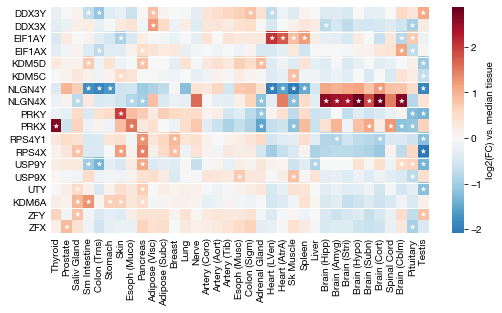

In [9]:
fig, ax = yd.plot_DE_results(res)
fig.savefig("{}/xyindiv_diffexp.pdf".format(outdir))